#Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history.In 1912,during her voyage, the Titanic sank after colliding with an iceberg,killing 1502 out of 2224 passengers and crew.

<font color="blue">
Content:
    
1. [Load and Chech Data](#1)
1. [Variable Description](#2)
    *  [Univariate Variable Analysis](#3) 
        *  [Categorical Variable Analysis](#4)
        *  [Numerical Variable Analysis](#5) 
    
1. [Basic Data Analysis](#6)    
1. [Outlier Detection](#7)    
1. [Missing Value](#8)       
    *  [Find Missing Value](#9) 
    *  [Fill Missing Value](#10)
1. [Visualization](#11) 
    * [Correlation Between SibSp -- Parch -- Age -- Fare -- Survived](#12)    
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass-- Survived](#15)
    * [Age-- Survived](#16)
    * [Pclass -- Age -- Survived](#17)
    * [Embarked -- Sex -- Pclass --  Survived](#18)
    * [Embarked -- Sex --  Fare -- Survived](#19)
    * [Fill Missing; Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split ](#30)
    * [Simple Logistic Regression ](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/tmp/ipykernel_18/3680041419.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="1"></a><br>
# Load and Chech Data

In [2]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId=test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2"></a><br>
# Variable Description
1. PassengerId :unique id number to eachb passenger
2. Survived : passenger survive(1) or died(0)
3. Pclass : passenger class
4. Name : name
5. Sex : gender of passenger
6. Age : age of passenger
7. SibSp : number of siblings/spouses
8. Parch : number of parents/children
9. Ticket : ticket number
10. Fare : amount of money spent on ticket
11. Cabin : cabin category
12. Embarked : port where passenger embarked(C= Cherbourg , Q=Queenstown,S=Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2) : Fare and Age
* int64(5) : Pclass, sibsp , parch ,passengerId and survived
* object(5) :Cabin , embarked ,ticket name and sex

<a id="3"></a><br>

# Univariate Variable Analysis
* Categorical Variable Analysis :Survived ,Sex ,Pclass ,Embarked, Cabin ,Name , Ticket , Sibsp and Parch
* Numerical Variable Analysis : Age , Fare and PassengerId

<a id="4"></a><br>

## Categorical Variable Analysis

In [7]:
def bar_plot(variable):
    """
        input :variable ex :"Sex"
        output: bar plot & value count
    
    """
    #get feature
    var=train_df[variable]
    #count number of categorical variable(value/sample)
    varValue=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {} ".format(variable,varValue))

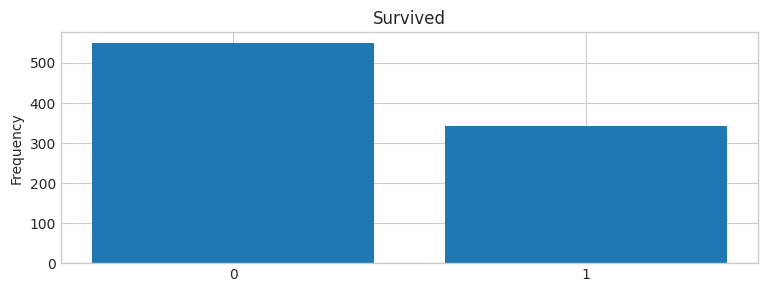

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64 


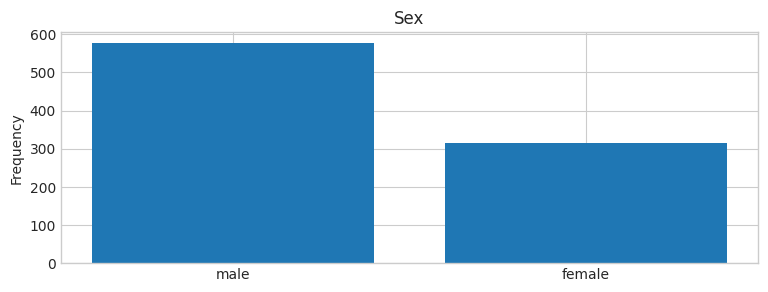

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64 


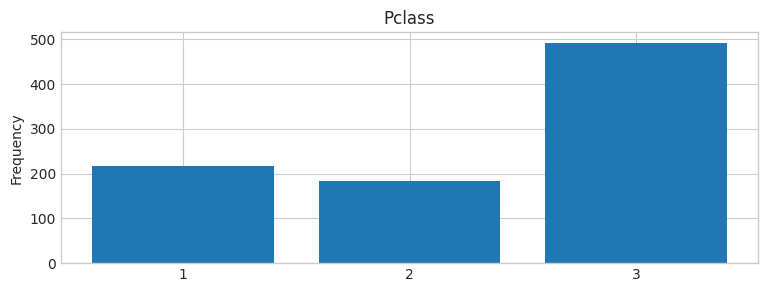

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 


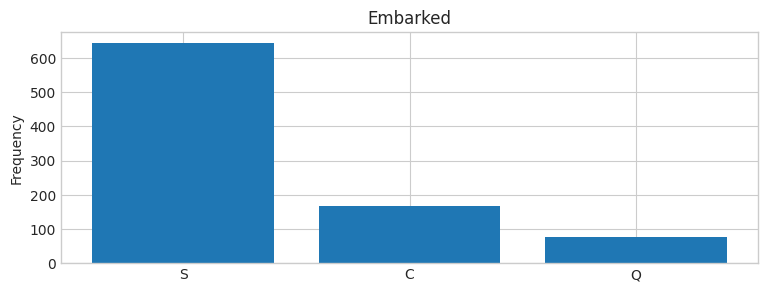

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 


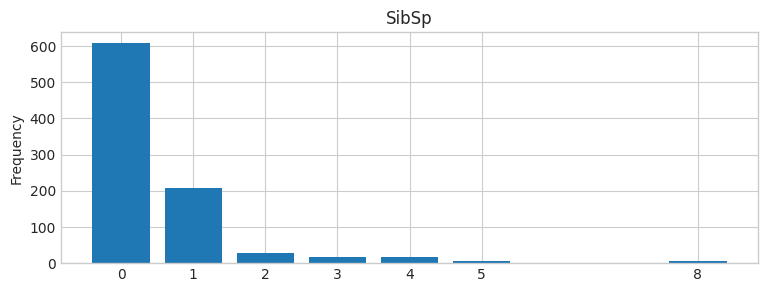

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 


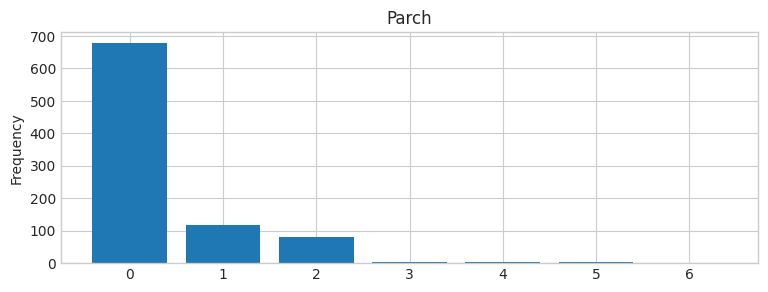

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 


In [8]:
category1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for i in category1:
    bar_plot(i)

In [9]:
category2=["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



<a id="5"></a><br>

## Numerical Variable Analysis

In [10]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

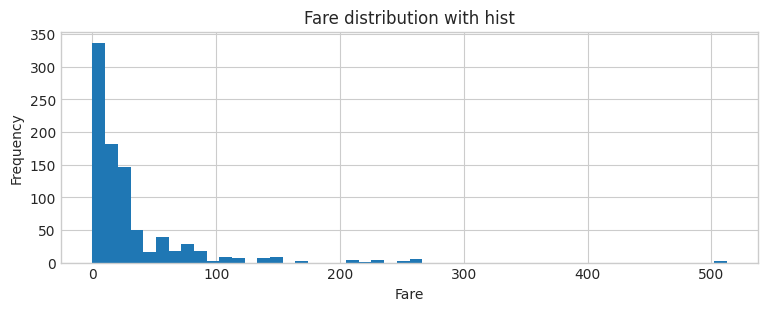

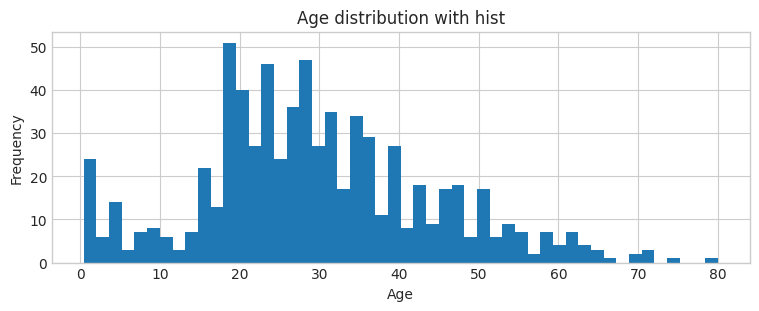

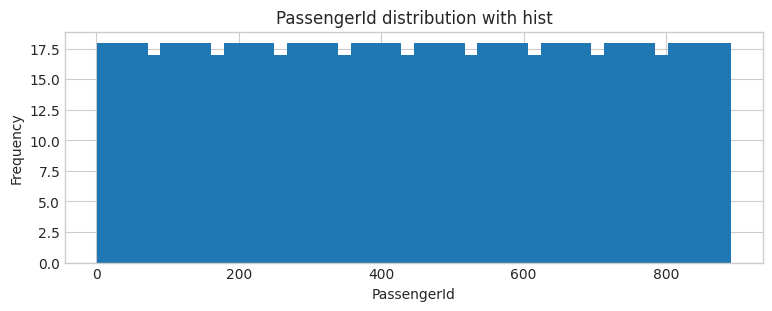

In [11]:
numericVar=["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id="6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [12]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
#Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
#Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
#SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
#Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id="7"></a><br>
# Outlier Detection

In [17]:
def detect_outliers(df,features):
    outlier_indices=[]
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c],25)
        #3rd quartile
        Q3=np.percentile(df[c],75)
        #IQR
        IQR=Q3-Q1
        #Outlier step
        outlier_step=IQR*1.5
        #detect outlier and their indeces
        outier_list_col=df[(df[c]<Q1) | (df[c]>Q3 + outlier_step)].index
    
        #store indeces
        outlier_indices.extend(outier_list_col)
    outlier_indices=Counter(outlier_indices)   
    multiple_outliers=list(1 for i,v in outlier_indices.items() if v>2 ) 
    return multiple_outliers

In [18]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [19]:
#drop outliers
train_df=train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

<a id="8"></a><br>
# Missing Value

* Find Missing Value
* Fill Missing Value

In [20]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)


In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


<a id="9"></a><br>
## Find Missing Value

In [22]:
train_df.columns[train_df.isnull().any()] #hangi kolonlarda boş değerler olduğunu buluruz

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum() #kolonlardaki  toplam boş değerler

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<a id="10"></a><br>
## Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1

In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
828,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

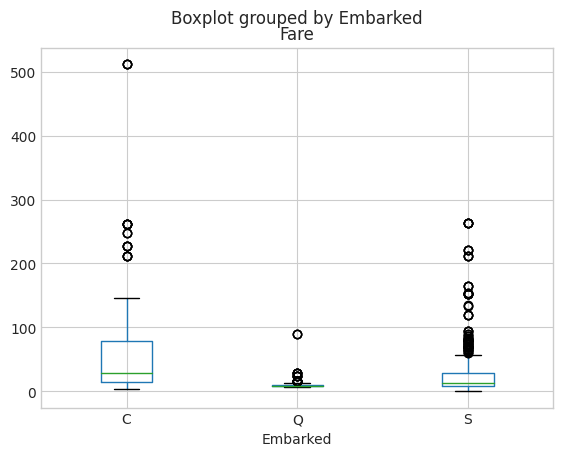

In [25]:
train_df.boxplot(column="Fare",by="Embarked")

In [26]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1042,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [29]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="11"></a><br>
# Visualization

<a id="12"></a><br>

## Correlation Between SibSp -- Parch -- Age -- Fare -- Survived

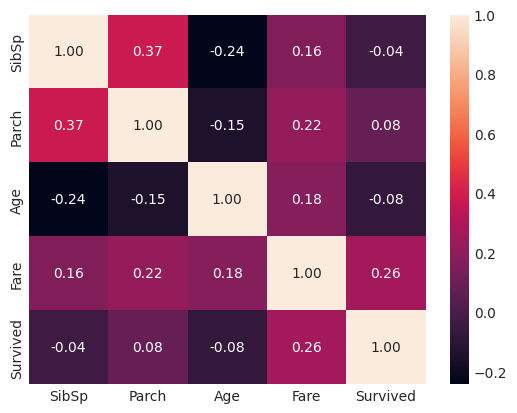

In [30]:
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f")
plt.show()

* Fare feature seems to have correlation with survived feature (0.26)

<a id="13"></a><br>
## SibSp -- Survived

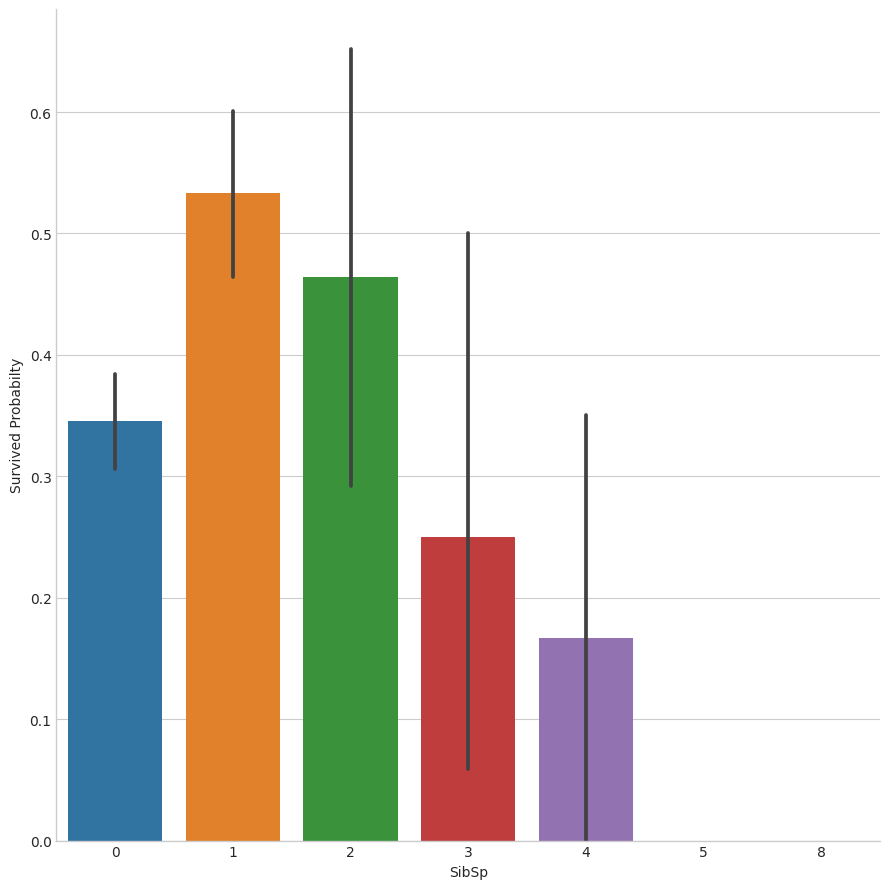

In [31]:
g=sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar", height=9)
g.set_ylabels("Survived Probabilty")
plt.show()

* Having a lot of SibSp have less chabce to survive.
* If sibsp==0 or 1 or 2, passenger has more chance to survive
* We can consider a new feature describing these categories.

<a id="14"></a><br>
## Parch -- Survived

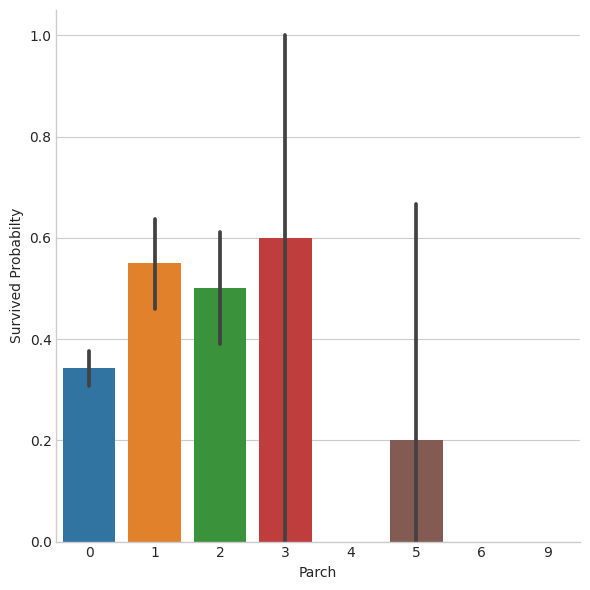

In [32]:
g=sns.catplot(x="Parch",y="Survived",data=train_df,kind="bar",height=6)
g.set_ylabels("Survived Probabilty")
plt.show()


* SibSp  and parch can be used for new feature extraction with th=3
*  small families have more chance to survive
* there is a std in survival of passenger with parch=3

<a id="15"></a><br>
## Pclass -- Survived

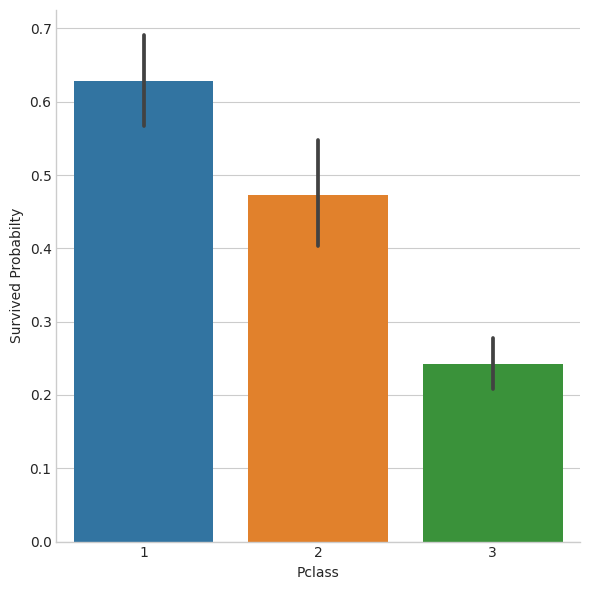

In [33]:
g=sns.catplot(x="Pclass",y="Survived",data=train_df,kind="bar",height=6)
g.set_ylabels("Survived Probabilty")
plt.show()

<a id="16"></a><br>
## Age -- Survived

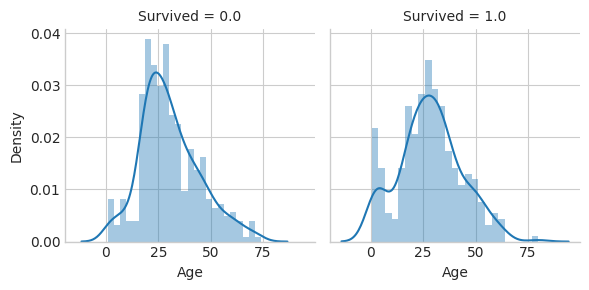

In [34]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age<=10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,,
* use age feature in training 
* use age distribution for missing value of age

<a id="17"></a><br>
## Pclass -- Age -- Survived

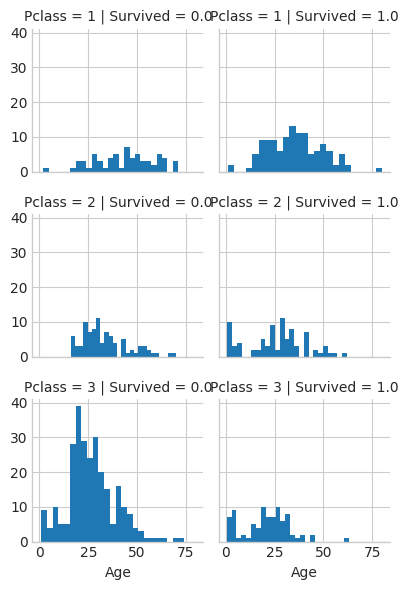

In [35]:
g=sns.FacetGrid(train_df,col="Survived",row="Pclass",height=2)
g.map(plt.hist, "Age", bins =25)
g.add_legend()
plt.show()

* pclass is important feature for model

<a id="18"></a><br>
## Embarked -- Sex --  Pclass -- Survived

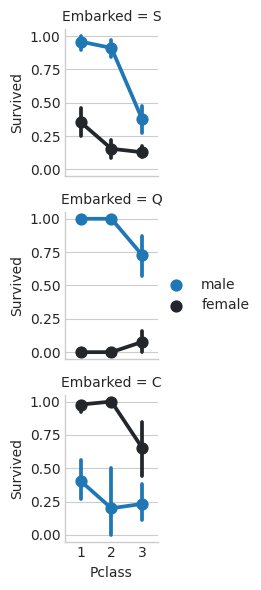

In [36]:
g=sns.FacetGrid(train_df,row="Embarked",height=2)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* male have better survival rate in pclass 3 in C.
* embarked and sex will be used in training


<a id="19"></a><br>
## Embarked -- Sex --  Fare -- Survived

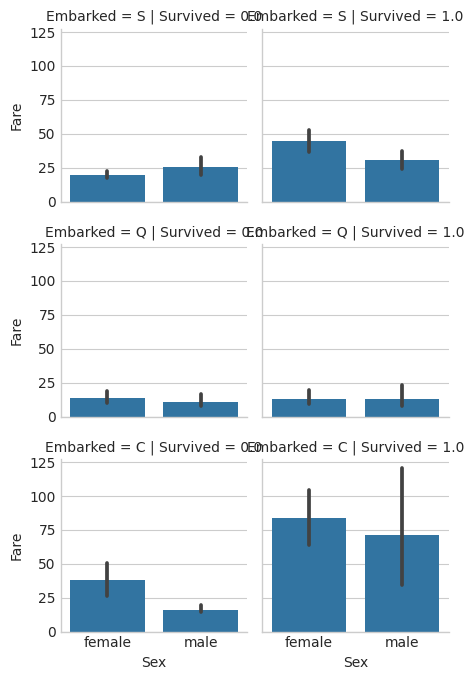

In [37]:
g=sns.FacetGrid(train_df,row="Embarked",col="Survived",height=2.3)
g.map(sns.barplot,"Sex","Fare")
g.add_legend()
plt.show()

* Passengers who pay higher fare have better survival.Fare can be used as categorical for training.

<a id="20"></a><br>
## Fill Missing; Age Feature

In [38]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
25,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1303,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


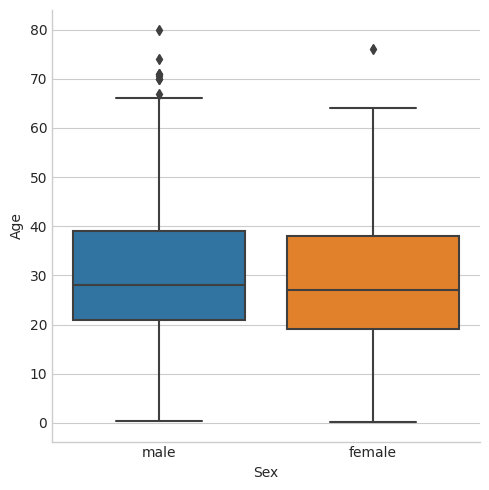

In [39]:
sns.catplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

Sex is not information for age prediction, age distribution seems to be same.(aralarında çokta bir fark yok)

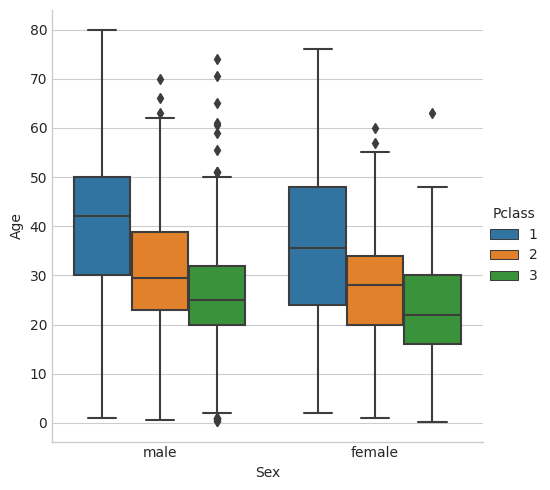

In [40]:
sns.catplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box")
plt.show()

1st class passengers are older than 2nd,and is older than 3rd class.


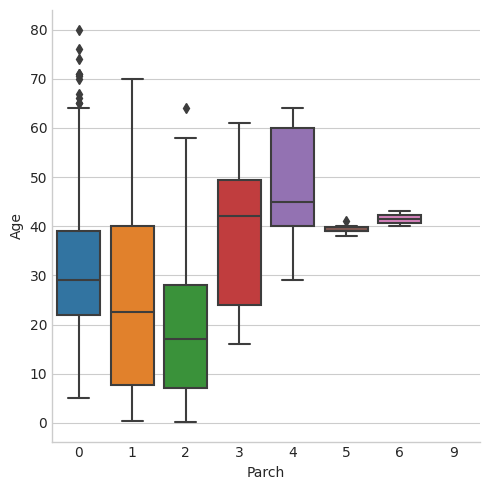

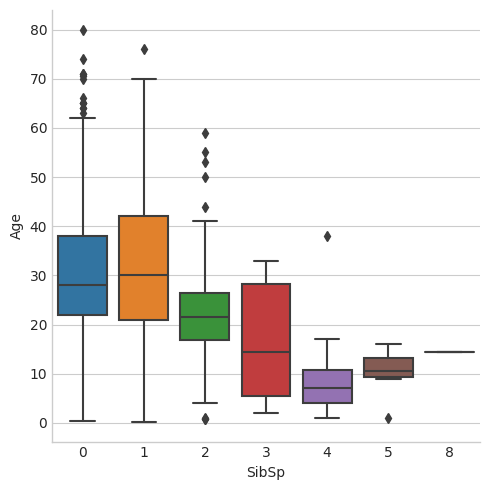

In [41]:
sns.catplot(x="Parch",y="Age",data=train_df,kind="box")
sns.catplot(x="SibSp",y="Age",data=train_df,kind="box")

plt.show()

In [42]:
train_df["Sex"]=[1 if i=="male" else 0 for i in train_df["Sex"]]

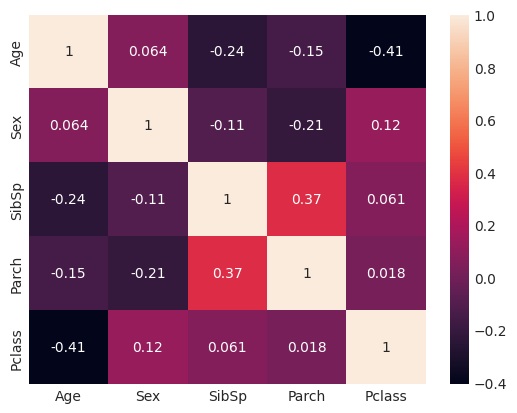

In [43]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but  is correlated with parch,sibsp and pclass

In [44]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

<a id="21"></a><br>

# Feature Engineering

<a id="22"></a><br>
## Name --- Title

In [45]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1                               Heikkinen, Miss. Laina
2         Futrelle, Mrs. Jacques Heath (Lily May Peel)
3                             Allen, Mr. William Henry
4                                     Moran, Mr. James
5                              McCarthy, Mr. Timothy J
6                       Palsson, Master. Gosta Leonard
7    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
8                  Nasser, Mrs. Nicholas (Adele Achem)
9                      Sandstrom, Miss. Marguerite Rut
Name: Name, dtype: object

In [46]:
name=train_df["Name"]
train_df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

In [47]:
train_df["Title"].head(10)

0        Mr
1      Miss
2       Mrs
3        Mr
4        Mr
5        Mr
6    Master
7       Mrs
8       Mrs
9      Miss
Name: Title, dtype: object

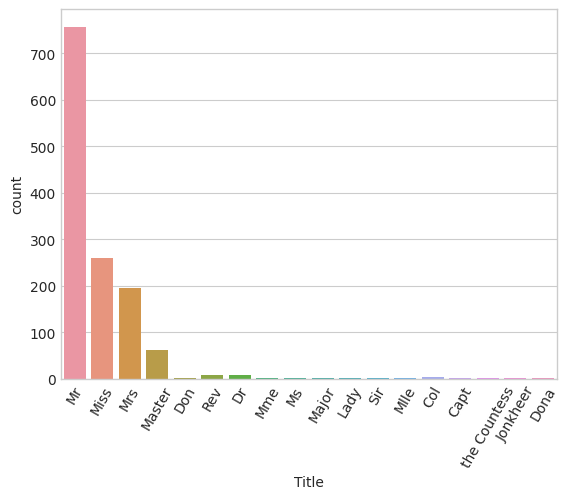

In [48]:
sns.countplot(x="Title",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [49]:
# convert to categorical
train_df["Title"]=train_df["Title"].replace(["Lady","the Countess","Capt","Col","Dona","Don","Dr","Major","Rev","Sir","Jonkheer"],"other")
train_df["Title"]=[0 if i=="Master" else 1 if i == "Miss" or i =="Ms" or  i=="Mlle" or i =="Mrs" else 2 if i== "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     2
4     2
5     2
6     0
7     1
8     1
9     1
10    1
11    2
12    2
13    1
14    1
15    0
16    2
17    1
18    1
19    2
Name: Title, dtype: int64

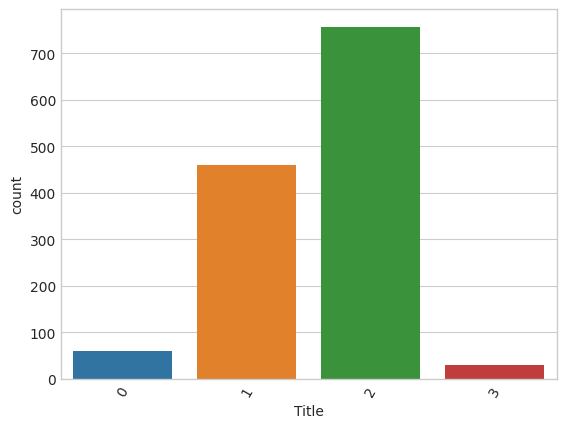

In [50]:
sns.countplot(x="Title",data=train_df)
plt.xticks(rotation=60)
plt.show()

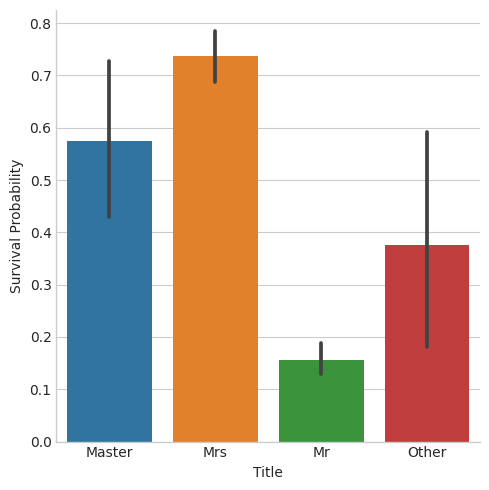

In [51]:
g=sns.catplot(x="Title",y="Survived",data=train_df,kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [52]:
train_df.drop(labels=["Name"],axis=1,inplace=True)


In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
2,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
3,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2
4,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,2


In [54]:
train_df=pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
2,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
3,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False
4,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False


<a id="23"></a><br>
## Family Size

In [55]:
train_df["FSize"]=train_df["SibSp"]+train_df["Parch"]+1


In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FSize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
2,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
3,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1
4,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1


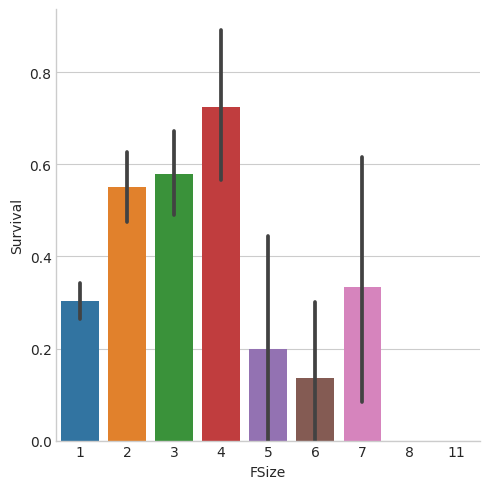

In [57]:
g=sns.catplot(x="FSize",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survival")
plt.show()

In [58]:
train_df["family_size"]=[1 if i<5 else 0 for i in train_df["FSize"]]

In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FSize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
2,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
3,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
4,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1


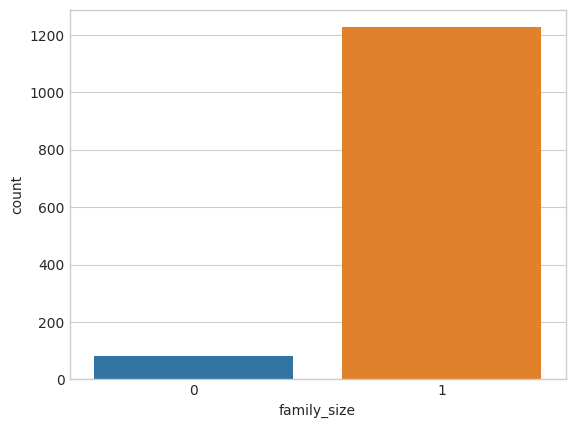

In [60]:
sns.countplot(x="family_size",data=train_df)
plt.show()

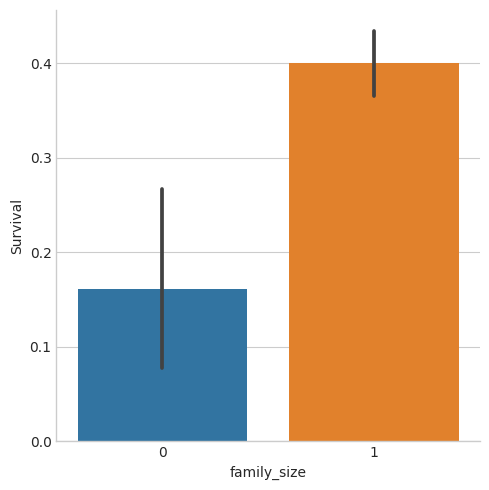

In [61]:
#ailedeki kişi sayısına göre hayatta kalma ilişkisi
g=sns.catplot(x="family_size",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survival")
plt.show()

Small families have more chance to survive than large families.

In [62]:
train_df=pd.get_dummies(train_df,columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
2,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
3,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True
4,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,False,True


<a id="24"></a><br>
## Embarked

In [63]:
train_df["Embarked"].head()

0    S
1    S
2    S
3    S
4    Q
Name: Embarked, dtype: object

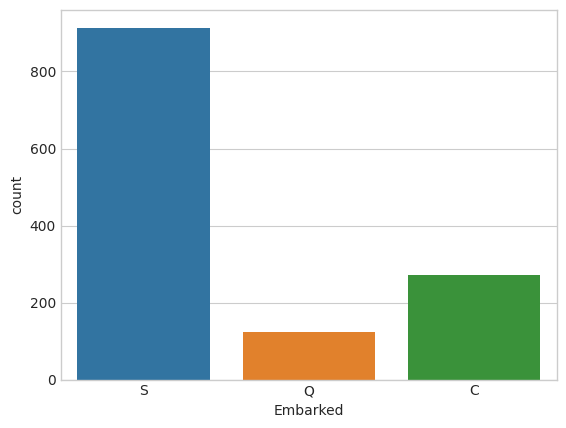

In [64]:
sns.countplot(x="Embarked",data=train_df)
plt.show()

In [65]:
train_df=pd.get_dummies(train_df,columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
2,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
3,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True
4,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,False,False,True,False,1,False,True,False,True,False


<a id="25"></a><br>
## Ticket

In [66]:
train_df["Ticket"].head(20)

0            A/5 21171
1     STON/O2. 3101282
2               113803
3               373450
4               330877
5                17463
6               349909
7               347742
8               237736
9              PP 9549
10              113783
11           A/5. 2151
12              347082
13              350406
14              248706
15              382652
16              244373
17              345763
18                2649
19              239865
Name: Ticket, dtype: object

In [67]:
tickets=[]
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"]=tickets        

In [68]:
train_df["Ticket"].head()

0        A5
1    STONO2
2         x
3         x
4         x
Name: Ticket, dtype: object

In [69]:
train_df=pd.get_dummies(train_df,columns=["Ticket"],prefix="T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1.0,3,0,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,True,False,False,False,False,False
2,4,1.0,1,0,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
3,5,0.0,3,1,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
4,6,0.0,3,1,25.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True


<a id="26"></a><br>
## Pclass

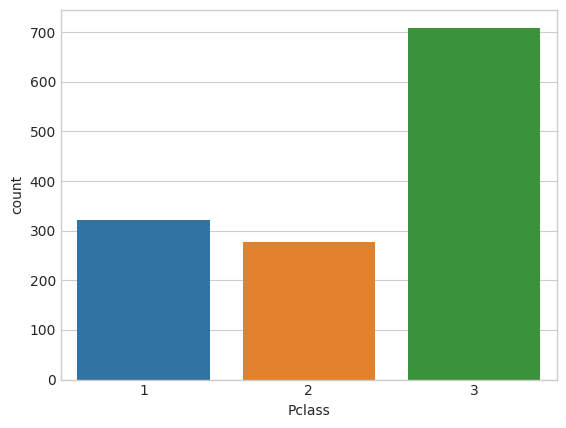

In [70]:
sns.countplot(x="Pclass",data=train_df)
plt.show()

In [71]:
train_df["Pclass"]=train_df["Pclass"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,3,1.0,0,26.0,0,0,7.9250,NaN,False,True,...,False,True,False,False,False,False,False,False,False,True
2,4,1.0,0,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
3,5,0.0,1,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True
4,6,0.0,1,25.0,0,0,8.4583,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


<a id="27"></a><br>
## Sex

In [72]:
train_df["Sex"]=train_df["Sex"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,3,1.0,26.0,0,0,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,True,True,False
2,4,1.0,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
3,5,0.0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,6,0.0,25.0,0,0,8.4583,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


<a id="28"></a><br>
## Drop Passenger ID and Cabin

In [73]:
train_df.drop(labels=["PassengerId","Cabin"],axis=1,inplace=True)

In [74]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'FSize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a id="29"></a><br>
# Modeling

In [75]:
from sklearn.model_selection import train_test_split, StratifiedKFold ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


<a id="30"></a><br>
## Train - Test Split

In [76]:
train_df_len

890

In [77]:
test=train_df[train_df_len:]
test.drop(labels=["Survived"],axis=1,inplace=True)

In [78]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
890,34.5,0,0,7.8292,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
891,47.0,1,0,7.0000,False,True,False,False,2,False,...,False,False,False,False,True,False,False,True,True,False
892,62.0,0,0,9.6875,False,False,True,False,1,False,...,False,False,False,False,True,False,True,False,False,True
893,27.0,0,0,8.6625,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
894,22.0,1,1,12.2875,False,True,False,False,3,False,...,False,False,False,False,True,False,False,True,True,False


In [79]:
train=train_df[:train_df_len]
x_train=train.drop(labels="Survived",axis=1)
y_train=train["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.33,random_state=42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

x_train 596
x_test 294
y_train 596
y_test 294
test 418


<a id="31"></a><br>
## Simple Logistic Regression

In [80]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
acc_log_train=round(logreg.score(x_train,y_train)*100,2)
acc_log_test=round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy:% {}".format(acc_log_train))
print("Testing Accuracy:% {}".format(acc_log_test))

Training Accuracy:% 82.21
Testing Accuracy:% 82.65


<a id="32"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation
We will compare 5 ML Classifier and evaluate mean accuracy of each of them by stratifier cross validation.
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression


In [81]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   knn_param_grid]

In [82]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8038700564971751
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8037570621468927
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8305649717514125
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8019491525423728


Text(0.5, 1.0, 'Cross Validation Scores')

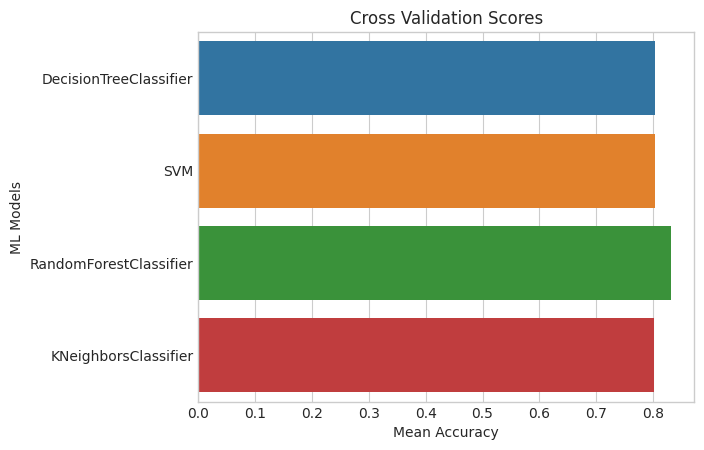

In [83]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "KNeighborsClassifier"]})

g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id="33"></a><br>
## Ensemble Modeling

In [84]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8367346938775511


<a id="34"></a><br>
## Prediction and Submission

In [85]:
test_survived=pd.Series(votingC.predict(test),name="Survived")
results=pd.concat([test_PassengerId,test_survived],axis=1)
print(results)


     PassengerId  Survived
0            892       0.0
1            893       1.0
2            894       0.0
3            895       0.0
4            896       1.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       1.0

[418 rows x 2 columns]
